### DATA 620
#### Project 1   
### [Video Presentation]()
##### Group Four
- Santosh Cheruku
- Vinicio Haro
- Javern Wilson
- Saayed Alam  


In [368]:
# load libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
from networkx.algorithms import bipartite as bi
% matplotlib inline

In this project, we are asked to identify and load a network dataset that has some categorical information available for each node. The dataset group 4 has selected to use is the highly popular flights database. The origin of this data can be found [here](https://openflights.org/data.html). Centrality measures can be used to predict (positive or negative) outcomes for a node. In our dataset we will predict **flight delays** (positive) or **no delays** (negative) outcomes for each **flight** (node). 

In [369]:
# load data
airport = pd.read_csv("https://raw.githubusercontent.com/saayedalam/Web-Analytics/master/Project1_data.csv")
airport.head()

,Nodes_1,Nodes_1_Delay,Nodes_2,Nodes_2_Delay,Edge
0,EWR,1,IAH,1,EWR-IAH
1,LGA,1,IAH,1,LGA-IAH
2,JFK,1,MIA,1,JFK-MIA
3,JFK,0,BQN,0,JFK-BQN
4,LGA,0,ATL,0,LGA-ATL


First we load the dataset and then create a graph using the `Networkx` package and print some graph information. The graph has 107 nodes or airports, 223 edges or flights and 4.17 of average degree. 

In [370]:
# load dataframe and print graph info
G = nx.from_pandas_edgelist(airport, source = 'Nodes_1', target = 'Nodes_2', create_using = nx.Graph())
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 107
Number of edges: 223
Average degree:   4.1682


Next we visualize the graph by creating unique source nodes (departure airport), directed nodes (arrival airport) and nodes with more than 1 edge (flights). 

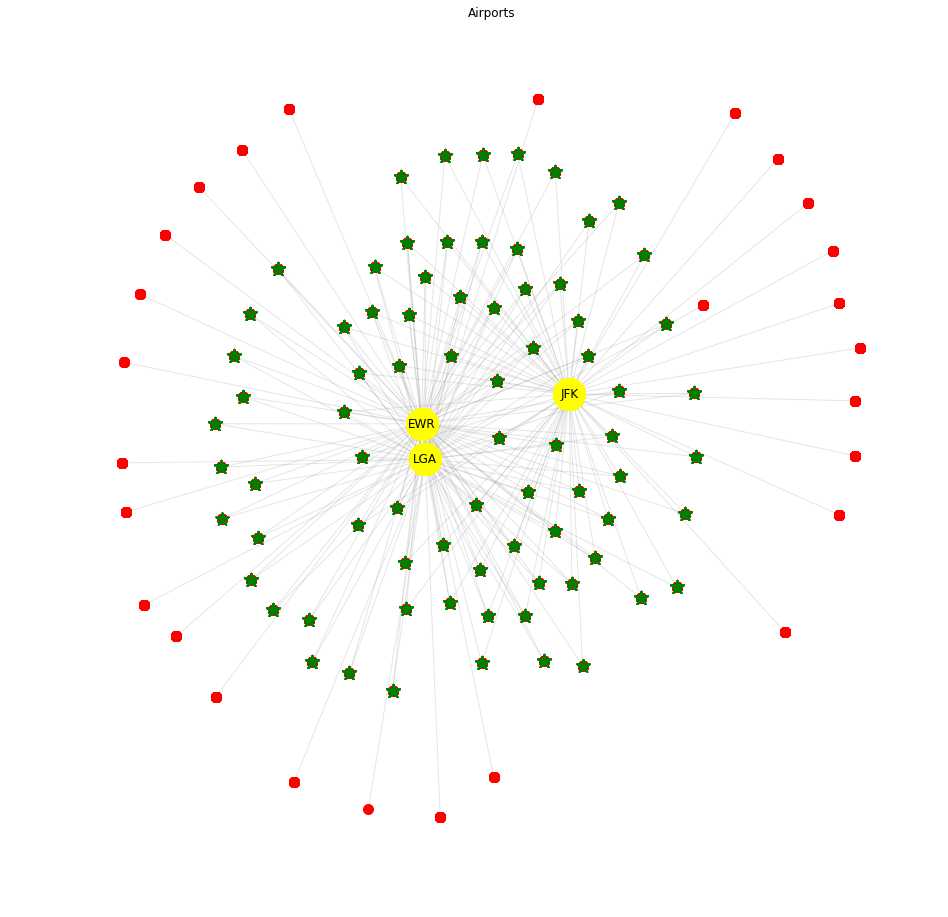

In [371]:
# adjust figure size
plt.figure(figsize=(16, 16))

# create variables for visualization
sp = nx.spring_layout(G)
n1 = list(airport.Nodes_1)
n2 = list(airport.Nodes_2)

# draw source nodes
nx.draw_networkx_nodes(G, sp, nodelist = n1, aplha = 0.2, node_size = 1000, node_color = 'yellow')

# draw target nodes
nx.draw_networkx_nodes(G, sp, nodelist = n2, node_color = 'red', node_size = 100)

# draw similar nodes with more than 1 edge
pop_airport = [n2 for n2 in n2 if G.degree(n2) > 1]
nx.draw_networkx_nodes(G, sp, nodelist = pop_airport, node_color = 'green', node_shape = '*', node_size = 200)
nx.draw_networkx_edges(G, sp, width = 1, edge_color = "gray", alpha = 0.2)

# add label
nx.draw_networkx_labels(G, sp, labels = dict(zip(n1, n1)))
plt.axis("off")
plt.title("Airports")
plt.show()

For each of the nodes in the dataset, we calculate degree centrality and eigenvector centrality and sort by descending order.

In [372]:
# calculate centrality
centrality = pd.DataFrame({
    "Degree Centrality" : list(nx.degree_centrality(G).values()),
    "Eigenvector Centrality" : list(nx.eigenvector_centrality(G).values())
}, index = list(G)).sort_values(by = ["Degree Centrality", "Eigenvector Centrality"], ascending = False)

centrality.head(5)

,Degree Centrality,Eigenvector Centrality
EWR,0.801887,0.456380
JFK,0.660377,0.382891
LGA,0.641509,0.380944
IAH,0.028302,0.090222
MIA,0.028302,0.090222


Finally we compare our centrality measures across our categorical groups. NetworkX does not have a custom bipartite graph class but the Graph() class can be used to represent bipartite graphs. However, we have to keep track of which set each node belongs to, and make sure that there is no edge between nodes of the same set. The convention used in NetworkX is to use a node attribute named bipartite with values 0 or 1 to identify the sets each node belongs to. To following code transform the data to adhere to this rule. 

In [373]:
# combine all nodes in to one column
nodes = a.Nodes_1.append(a.Nodes_2)
delay = a.Nodes_1_Delay.append(a.Nodes_2_Delay)
no_de = pd.concat([nodes, delay], axis = 1).rename(index = str, columns={0: "Nodes", 1: "Delay"})

##no_de.rename(index = str, columns={0: "Nodes", 1: "Delay"}, inplace = True)
# separate nodes according to which set they belong to 
one = no_de.loc[no_de['Delay'] == 1] 
zero = no_de.loc[no_de['Delay'] == 0]

# combine edges so that there is no edge between nodes of the same set
edge1 = a.loc[(a["Nodes_1_Delay"] == 1) & (a["Nodes_2_Delay"] == 1)]
edge0 = a.loc[(a["Nodes_1_Delay"] == 0) & (a["Nodes_2_Delay"] == 0)]
edge = edge1.append(edge0)

In [374]:
# create a networkx graph class
A = nx.Graph()

# add nodes with the node attribute "bipartite"
A.add_nodes_from(zero, bipartite = 0)
A.add_nodes_from(one, bipartite = 1)

# add edges only between nodes of opposite node sets
A.add_edges_from(list(zip(edge.Nodes_1, edge.Nodes_2)))

# print graph info
print(nx.info(A))

Name: 
Type: Graph
Number of nodes: 109
Number of edges: 220
Average degree:   4.0367


Here, we check whether the graph we created is bipartite. Then we calculate the centrality measures for the new graph. We see a decrease in the centrality for bi-model network. The fraction of nodes it is connected to has decreased because this graph only accounts for the flights that had **no delay**. 

In [375]:
# check if the graph is bipartite
print(bi.is_bipartite(A))

True


In [376]:
# calculate centrality for bipartite graph
centralityb = pd.DataFrame({
    "Degree Centrality" : list(nx.degree_centrality(A).values()),
    "Eigenvector Centrality" : list(nx.eigenvector_centrality(A).values())
}, index = list(A)).sort_values(by = ["Degree Centrality", "Eigenvector Centrality"], ascending = False)

centralityb.head(5)

,Degree Centrality,Eigenvector Centrality
EWR,0.787037,0.462883
LGA,0.629630,0.383727
JFK,0.620370,0.372138
IAH,0.027778,0.091112
MIA,0.027778,0.091112


Finally, we visualize the graphy by categorical variable available for each node. In the departure node i.e. node 2, we see a network of airports - LGA, EWR, JFK, with the highest centraility and so on. Again this only accounts for flights that were on time. In the arrival node i.e. node 1, we see flights that have arrived on time. Particularly, an airport with the code SRQ has several arriving flights on time because it is an airline hub. Airline hub is used by one or more airlines to concentrate passenger traffic and flight operations at a given airport. They serve as transfer points to get passengers to their final destination. 

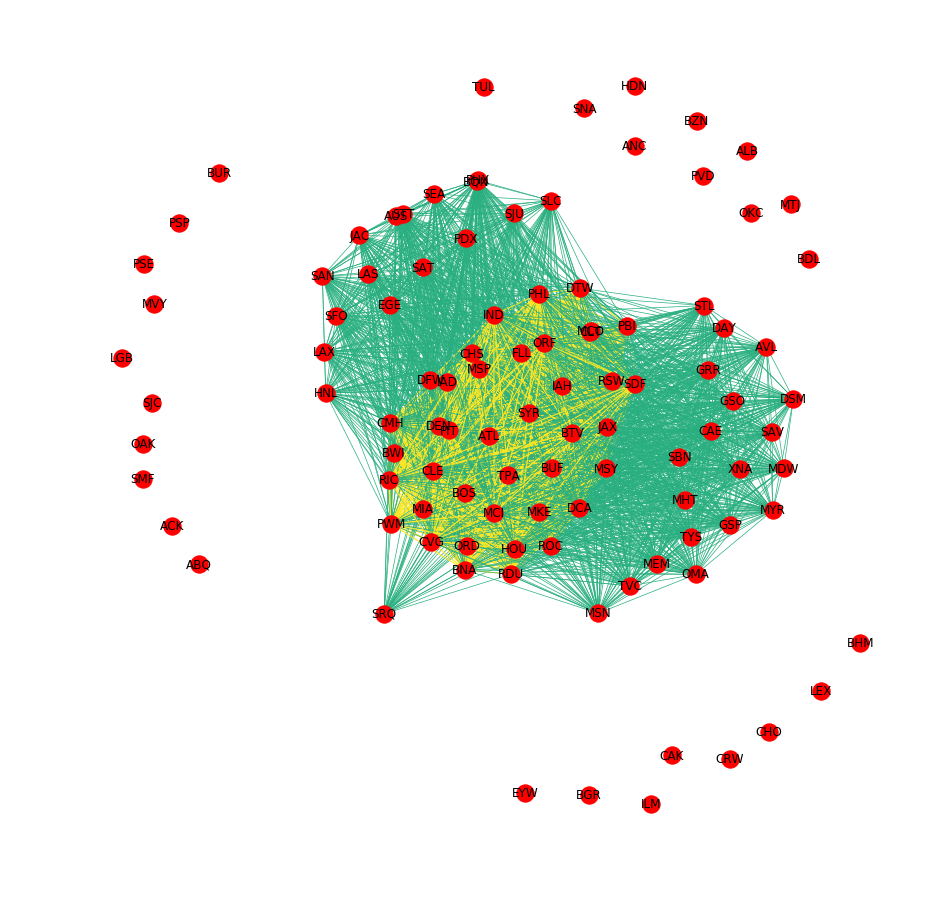

In [377]:
# adjust figure size
plt.figure(figsize=(16, 16))

# departure flight network 
desnet = bi.weighted_projected_graph(A, airport['Nodes_2'], ratio = False)
weights = [math.log(edata['weight']) for f, t, edata in desnet.edges(data = True)]
nx.draw_networkx(desnet, width = weights, edge_color = weights)
plt.axis("off")
plt.show()

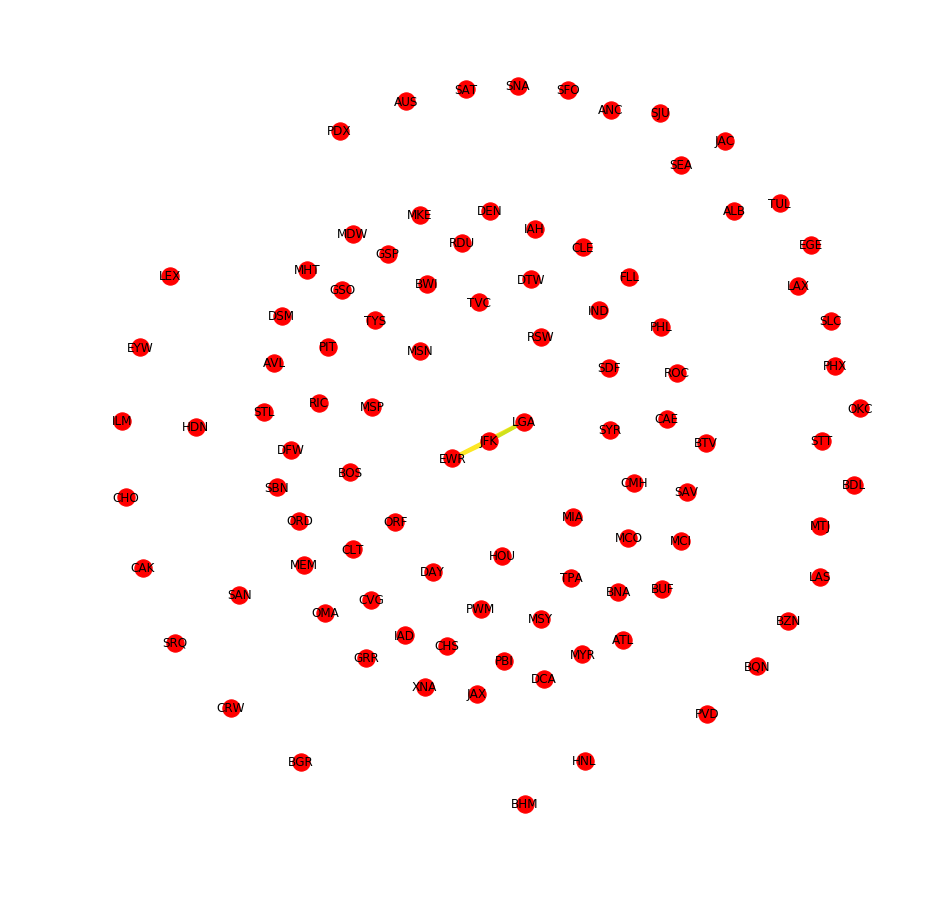

In [378]:
# adjust figure size
plt.figure(figsize=(16, 16))

# arrival flight network 
orgnet = bi.weighted_projected_graph(B, airport['Nodes_1'], ratio = False)
weights = [math.log(edata['weight']) for f, t, edata in orgnet.edges(data = True)]
nx.draw_networkx(orgnet, width = weights, edge_color = weights)
plt.axis("off")
plt.show()